In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('survey.csv')
questions = df.columns

def print_answers(answers):
    for i, answer in enumerate(answers): 
        print(i+1, answer)

def count_multiple_choice_answers(answers):
    answers_count = []
    for answer in answers.dropna():
        answers_count += answer.split(';')
    return pd.array(answers_count).value_counts()

# 1: Omtrent hvor mange rundballer bruker gården i året?

En person har svart "250 tørre" som har blit gjort om til "250".

<AxesSubplot:>

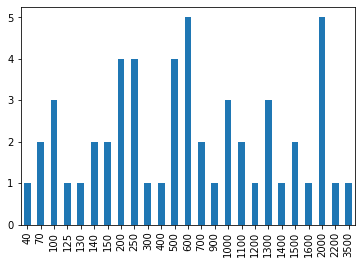

In [3]:
df[questions[1]].value_counts().sort_index().plot(kind='bar')

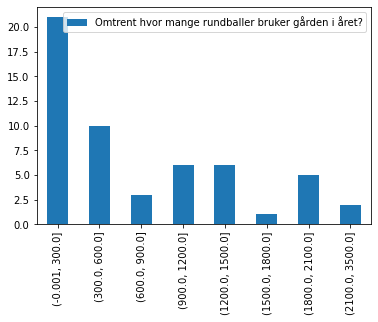

In [4]:
# samme chart i intervaler
out = pd.cut(df[questions[1]], bins=[0, 300, 600, 900, 1200, 1500, 1800, 2100, 3500], include_lowest=True)
out.value_counts(sort=False).plot(kind='bar').legend(loc=0)

# 2: Ca. hvor mange lage plast er det på hver rundball?

Verdier som ligger langt uten for rimelighentes grenser (feks. "690 lag") er fjernet.

Noen har svart med intervaller, feks 10-12, som har har blit gjort om til gjennomsnittet 10-12->11. 

<AxesSubplot:>

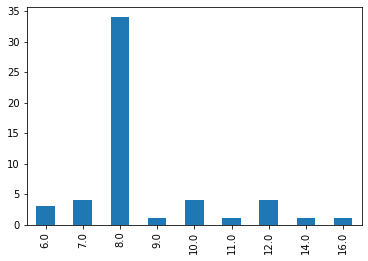

In [5]:
df[questions[2]].value_counts().sort_index().plot(kind='bar')

# 3: Presser du egne rundballer eller kjøper du tjenesten (dvs. kjøpe pressing, pakking og plast som en pakke)?
Ingenting som måtte endres på

<AxesSubplot:>

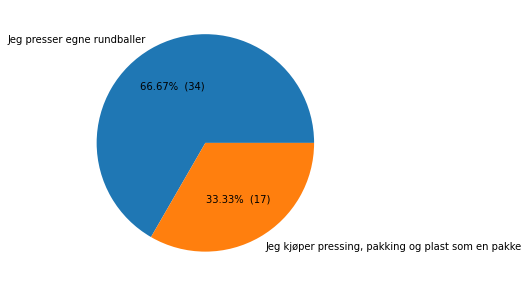

In [6]:

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
    
df[questions[3]].value_counts().plot.pie(figsize=(5,5), ylabel="", autopct=make_autopct(df[questions[3]].value_counts()))


# 4: Hvis du presser egne, hvor mye betaler du (ca) for plasten i året? 

To har svart "Mellom kr 6000- 8000" som blir gjort om til snitt -> 7000 kr.

En har svart "Ca kr 45 pr ball", vedkommende har også svart på #1 (antall rundballer i året) som er 300 rundballer i året, som gir 45 * 300 = 13 500 kr.

En har svart "40lapper". Antar at lapper betyr 1000 kr -> 40 000 kr. 

En annen har svart "ca 840 pr rull i år" som ikke lar seg tolkes så svaret er dermed fjernet. 


<AxesSubplot:>

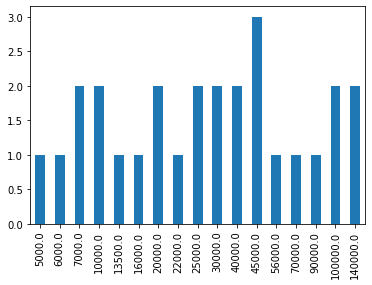

In [7]:
df[questions[4]].value_counts().sort_index().plot(kind='bar')


# 5: Hvis du kjøper pressing, pakking og plast, hvor mye betaler du (ca) for dette i året?

En har svart "200 ,- pr stk + mva", vedkommende har også svart på #1 (1400), som gir 200 * 1400 = 280 000 kr

En annen har svart "200 per ball" og svart #1 (140), som gir 200 * 140 = 28 000kr

<AxesSubplot:>

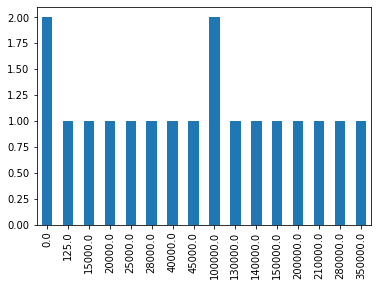

In [8]:
df[questions[5]].value_counts().sort_index().plot(kind="bar")

# 6: Alder
Ingenting å endre på.

<AxesSubplot:>

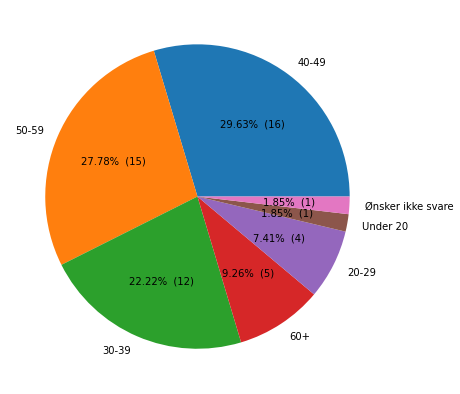

In [9]:
df[questions[6]].value_counts().plot.pie(figsize=(7,7), ylabel="", autopct=make_autopct(df[questions[6]].value_counts()))

# Inndeling: Utfordringer knyttet til resirkulering av rundballeplast


# 7: Opplever du utfordringer med oppbevaring av plast?
Ingenting å endre på.

<AxesSubplot:>

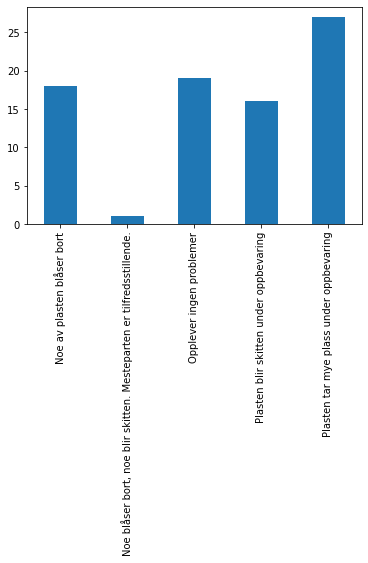

In [10]:
count_multiple_choice_answers(df[questions[7]]).sort_index().plot(kind="bar")

# 8: Hvor oppbevarer du plasten? (Innendørs, utendørs, under tak, i container osv.)
Her var det mange ulike svar, så har prøvd å gruppere de. Flersvar skilt med ";".

Flere har svart "ute" -> "Utendørs" og "inne" -> "Innendørs". 

"Utendørs ved siden av rundballelageret." -> "Utendørs".

"Under tak i en carport" -> "Carport".

"Inne på låven" -> "Innendørs".

"Både ute og inne allt etter hvor de er når de strippes" -> "Innendørs;Utendørs".

"I vedsekker, noe innendørs noe utendørs" -> "Innendørs;Utendørs;Vedsekk".

"Ute underlåvebrua og snø" -> "Utendørs".

"I forsentral innendørs" -> "Innendørs".

"Eg legger plasten i vedsekk i ein ibc dunk." -> "Vedsekk;Container".

"Bruker vedkorg for storsekk" -> "Vedkorg".

"Pakker inne buntes sammen lagres ute" -> "Utendørs".

"Under tak til det er fult inne da blir det flyttet ut i container" -> "Innendørs;Container".

"På pakker ute etter at den er presset" -> "Utendørs".

"container som blir tømt av renovasjonsselskap når den er full" -> "Container".

"Utendørs, ved fjøsveggen i ly for vinden, stort sett" -> "Utendørs".

"Utendørs, i 1500 liters vedsekk" -> "Utendørs;Vedsekk".

"Ute,men i container" -> "Container".

"Blir presset i firkantballer og blir lagret ute. Så lenge dei er presset og buntet sammen med tau så fungerer det godt." -> "Utendørs".

"Oppsamling innandørs, oppbevaring for avhenting på skjerma plass ute" -> "Utendørs".

"Utendørs container" -> "Container".

<AxesSubplot:>

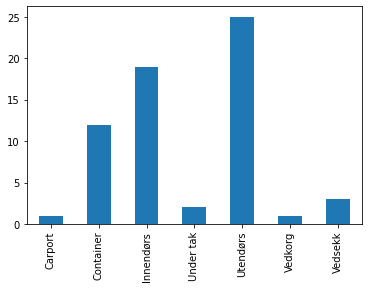

In [11]:
count_multiple_choice_answers(df[questions[8]]).sort_index().plot(kind="bar")

# 9: Bruker du en form for presse til å komprimere plasten?


<AxesSubplot:>

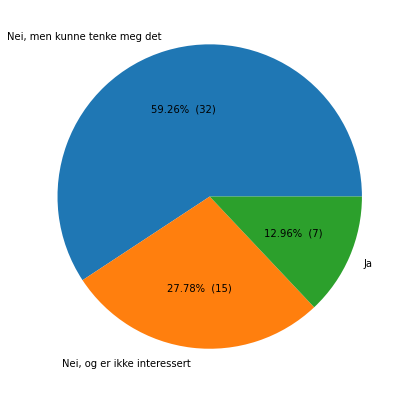

In [12]:
df[questions[9]].value_counts().plot.pie(figsize=(7,7), ylabel="", autopct=make_autopct(df[questions[9]].value_counts()))

# 10: Kommentar (For eksempel hva slags presse, vil det gjøre renhold enklere, løse plassproblemer osv., tanker om pris):


In [13]:
q10 = df[questions[10]].dropna()
print_answers(q10)

1 Papp presse
2 Prisen bør ikke overstige ca. 30000 kr hvis dette skal kunne konkurrere med dagens ordning med henting på gården.
3 Ei presse hvor en kan bruke traktorens hydraulikk . Maks kr. 50000,-
4 Gammel rundballepresse eller kommprimator
5 Vil bli enklere å transportere til mottak. Vil ta mindre plass.
6 Pris er avgjørende på pressa men plasten har blitt bedre ivaretatt.
7 Hopper selv plasten i vedsekker
8 Løser plassproblemer og lettere å levere.
9 Komprimerer med traktor, leverer et lass som kan kjøres med klype på frontlaster 1-2 ganger pr. mnd
10 Ønsker presse, alt for dyrt å investere i
11 Vet ikke
12 Lik ei papirpresse
13 Må være billig, gjerne sånn som også kan presse papp
14 Komprimator til billig pris
15 Liten presse til under 10 tusen, for oss som driver smått, kan ikke bli så tungt at det er vanskelig å håndtere
16 Ein enkel papp/plast komprimator vil gjøre plasthåndteringa mykje enklare.
17 Koster for mye, ingen plass å ha presse innendørs
18 Enkel emballasje presse


# 11: Hvordan rengjør du plasten før den leveres/hentes?

<AxesSubplot:>

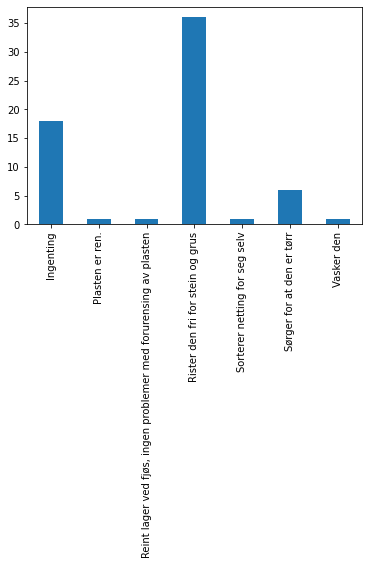

In [14]:
count_multiple_choice_answers(df[questions[11]]).sort_index().plot(kind="bar")

# 12: Utfordringer knyttet til dette?

In [15]:
q12 = df[questions[12]].dropna()
print_answers(q12)

1 Enkelt når det brukes bredplast i stedet for nett, kun ett sortiment
2 Blir med en del is og snø.
3 Plasten tar mye plass og bør ikke lagres direkte på bakken da den fryser fast og ikke løsner igjen før langt utpå sommeren.
4 Det vil alltid sitte igjen små mengder forresten, og noe grus, spessielt om det er vått i perioder.
5 Nei
6 Noe fôrrester kan ligge mellom laga med plast. Dett kan være utfordrende å få vekk.
7 Ingen
8 Nei
9 Nei
10 Nei
11 Ingen returordning i kommunen
12 is tiner seint, så det må taes over flere runder
13 Ingen
14 Mye arbeid
15 Ikke all dritt går av
16 Blir veldig bløtt rundt pressa
17 Innerfolien er vanskelegare å få rein enn sjølve plasten
18 Tidkrevende og vaske all plasten
19 Plast av fuktig ball blir aldri rein
20 Stort sett lite rusk i plasten med tørre baller. Og tørr lagerplass
21 Ingen
22 Regn og snø
23 Ingen utfordring
24 Bløte rundballer og bløte forhold på lagringsplass bidrar til skinner plast.


# 13: Hender det at du lar plasten ligge igjen på jordet? I så fall, hvorfor?

"Hender ikke" -> "Nei"

"Aldri" -> "Nei"

I Google Forms blir svarene presentert i en bar chart, men tenker at det er mer praktisk å vise fram svarene til de som ikke har svart "Nei".

In [16]:
q13 = df[df[questions[13]] != "Nei"][questions[13]].dropna()
print_answers(q13)

1 Noen ender kan være frosset fast.
2 Om det fryser fast/ snør ned. Runder hvor vi plukker opp når været tillater
3 Ja, små strimler eller lignende. rein latskap
4 I utgangspunktet ikke. Det som kan skje er at halen kommer undet hjulet på traktoren og blir slitt av, men dette blir plukket opp, men noen ganger kan det jo skje at en ikke ser dei.
5 Fryser fast ibakken


# 14: Hvordan hentes/leveres plasten til gjenvinning?

<AxesSubplot:>

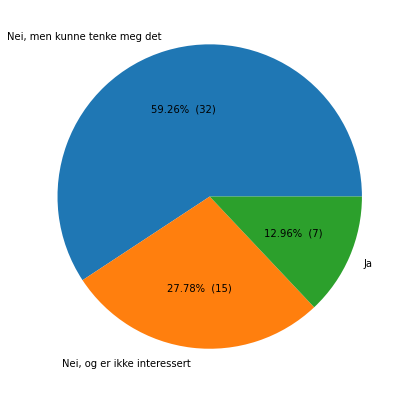

In [17]:
df[questions[9]].value_counts().plot.pie(figsize=(7,7), ylabel="", autopct=make_autopct(df[questions[9]].value_counts()))

# 15: Fungerer henting/levering av plast greit?

<AxesSubplot:>

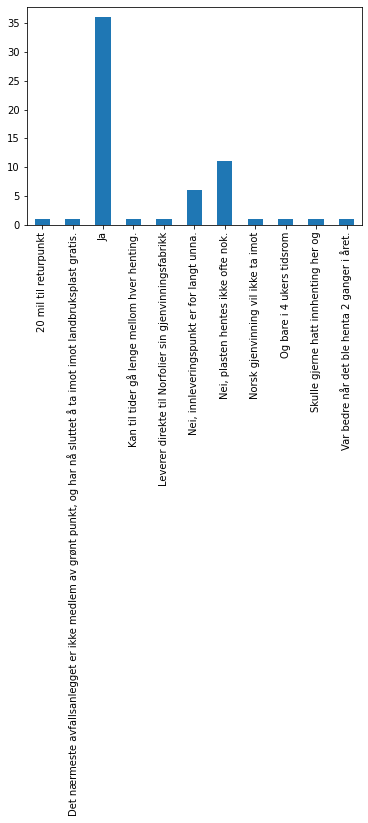

In [18]:
count_multiple_choice_answers(df[questions[15]]).sort_index().plot(kind="bar")

# Inndeling: Pilotprosjekt - resirkulering av landbruksplast

# 16: Hva mener du om en slik ordning? (som beskrevet øverst)

In [19]:
q16 = df[questions[16]].dropna()
print_answers(q16)

1 Greit de men må da hentes i løpet av mai
2 Lurt
3 Det høres interessant ut
4 Positiv
5 Bra
6 Ordningen høres veldig bra ut, håper flere vil samarbeide og bidra med dette også
7 Kunne vært interessant hvis plasten blir hentet opptil 4 ganger i året så en slipper å ha plast liggende over "hele garden"
8 Blir da avhengig av å kjøpe plast fra de?! Ikke ideelt. Det er og umulig å få all plast heil rein for grus etc, skal ikke mer til en at en kjører over den en gang, eller setter rundballen med plast med et sted det er litt sølete, før den blir møkkete. Det vil være totalt uaktuelt å måtte vaske plaste. Opplegget som det er nå, med gratis mottak fungerer relativt greit, men det er for lange avstander til disse mottakene. Det burde være kortere vei for å levere.
9 Bra
10 Vet ikke
11 Er nok for langt unna til at det lønner seg samt er liten bruker
12 Interessant
13 Godt tiltak
14 Har allerede en gjennvinningsgrad på tilnærmet 100% (minus svinn/tap i forbindelse med pressing og transport) og

# 17:  Hvor stor andel av kjøpesummen av plasten må minst refunderes for at dette prosjektet er interessant?

<AxesSubplot:>

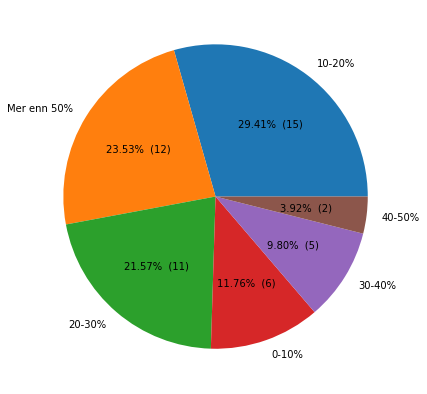

In [20]:
df[questions[17]].value_counts().plot.pie(figsize=(7,7), ylabel="", autopct=make_autopct(df[questions[17]].value_counts()))

# 18: Hva er den viktigste motivasjonen for deg?

<AxesSubplot:>

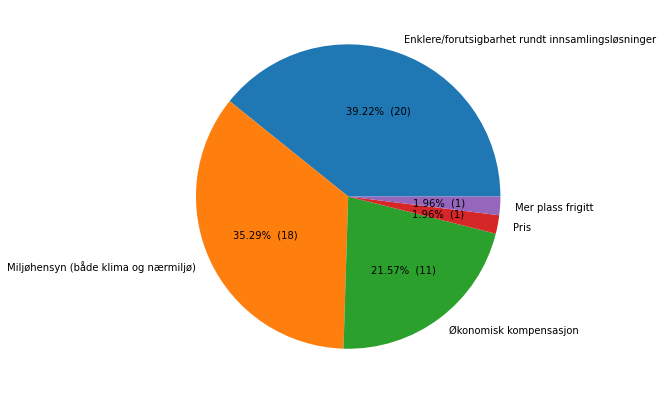

In [21]:
df[questions[18]].value_counts().plot.pie(figsize=(7,7), ylabel="", autopct=make_autopct(df[questions[18]].value_counts()))

# 19: Vil du være villig til binde deg til én leverandør av plast og utstyr for en periode?

<AxesSubplot:>

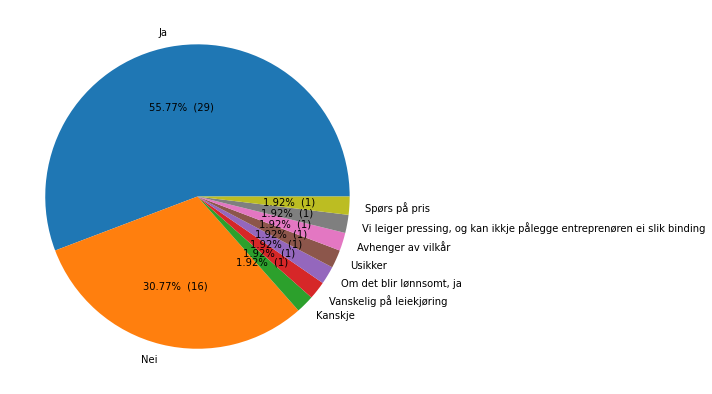

In [22]:
df[questions[19]].value_counts().plot.pie(figsize=(7,7), ylabel="", autopct=make_autopct(df[questions[19]].value_counts()))

# 20: Er det interessant om en enkel plastpresse inngår i avtalen med Orkel?

<AxesSubplot:>

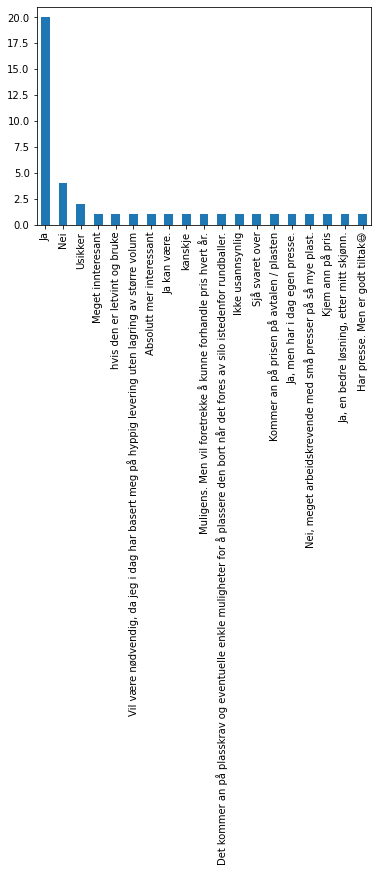

In [23]:
df[questions[20]].dropna().value_counts().plot(kind="bar")

In [24]:
q20 = df[df[questions[20]] != "Ja"][questions[20]].dropna()
print_answers(q20)

1 Nei
2 Ja, en bedre løsning, etter mitt skjønn.
3 Har presse. Men er godt tiltak😃
4 Vil være nødvendig, da jeg i dag har basert meg på hyppig levering uten lagring av større volum
5 Kommer an på prisen på avtalen / plasten
6 Meget innteresant
7 kanskje
8 Ikke usannsynlig
9 Nei
10 Nei, meget arbeidskrevende med små presser på så mye plast.
11 Usikker
12 Absolutt mer interessant
13 Sjå svaret over
14 Det kommer an på plasskrav og eventuelle enkle muligheter for å plassere den bort når det fores av silo istedenfor rundballer.
15 Kjem ann på pris
16 Ja kan være.
17 Nei
18 Usikker
19 Ja, men har i dag egen presse.
20 Muligens. Men vil foretrekke å kunne forhandle pris hvert år.
21 Nei
22 hvis den er letvint og bruke


# Inndeling: Takk for din deltagelse!

# 21: Har du noen andre kommentarer?

In [25]:
q21 = df[questions[21]].dropna()
print_answers(q21)

1 Hvis et slikt opplegg gjør plastkostnadene rimeligere tror jeg interessen kan være stor, så suksessen vil avhenge av at plastpris minus refusjon minst blir konkurransedyktig i markedet.
2 Det kler beste, og mest miljøvennlige vil være å få en strekkplast som løser seg opp etter en tid, og som kanskje dyr kan spise uten problem
3 Har hatt en brukbar ordning med innsamling av plast gjennom grønt punkt, når ordningen begynner å fungere så fjernes selvfølgelig tilskuddet til renovatører så disse gir seg med innsamling.
4 Håper det kommer gode løsninger
5 Se på comprimatorer med store inkastningsrom, dette gjør håndtering og lagring av plasten enkel. Hentes enkelt med krokbil.
6 Tenker det er viktig med gode løsninger på oppbevaring og innsamling, rundballeplast på avveie synes godt og kan se mye ut,selv om det bare er noen få remser.
7 Bra det settes fokus på rundballeplast
8 Flott prosjekt.
9 For at dette skal være interessant må det bidra til lavere kostnader. Oppbevaring av plast og i